# Herron - Downloading Data

This notebook shows how to use the yfinance, pandas-datareader, and requests-cache packages to download data from 
    [Yahoo! Finance](https://finance.yahoo.com/), 
    [the Kenneth French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html), 
    [the Federal Reserve Economic Database (FRED)](https://fred.stlouisfed.org/), 
    and others.
For completeness, this notebooks also covers saving to and reading from .csv and .pkl files.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['figure.dpi'] = 150
%precision 4
pd.options.display.float_format = '{:.4f}'.format

## The yfinance Package

The [yfinance package](https://github.com/ranaroussi/yfinance) provides "a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance."
Other packages that provide similar functionality, but I think yfinance is simplest to use.
To avoid repeated calls to Yahoo! Finance's advanced programming interface (API), we will use the [requests-cache package](https://github.com/requests-cache/requests-cache).
These packages should already be installed in your DataCamp Workspace environment.
If not, we can install these packages with the `%pip` magic in the following cell, which we only need to run once.
If you use a local installation of the Anaconda distribution, you can instead run `! conda install -y -c conda-forge yfinance requests-cache`.

In [3]:
# %pip install yfinance requests-cache

In [4]:
# ! conda install -y -c conda-forge yfinance requests-cache

In [5]:
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

We can download data for the FAANG stocks (Facebook, Amazon, Apple, Netflix, and Google).
We can pass tickers as either a space-delimited string or a list of strings.

In [6]:
faang = yf.download(tickers='META AMZN AAPL NFLX GOOG', session=session)

[                       0%                       ]

[*******************   40%                       ]  2 of 5 completed

[**********************80%*************          ]  4 of 5 completed

[*********************100%***********************]  5 of 5 completed

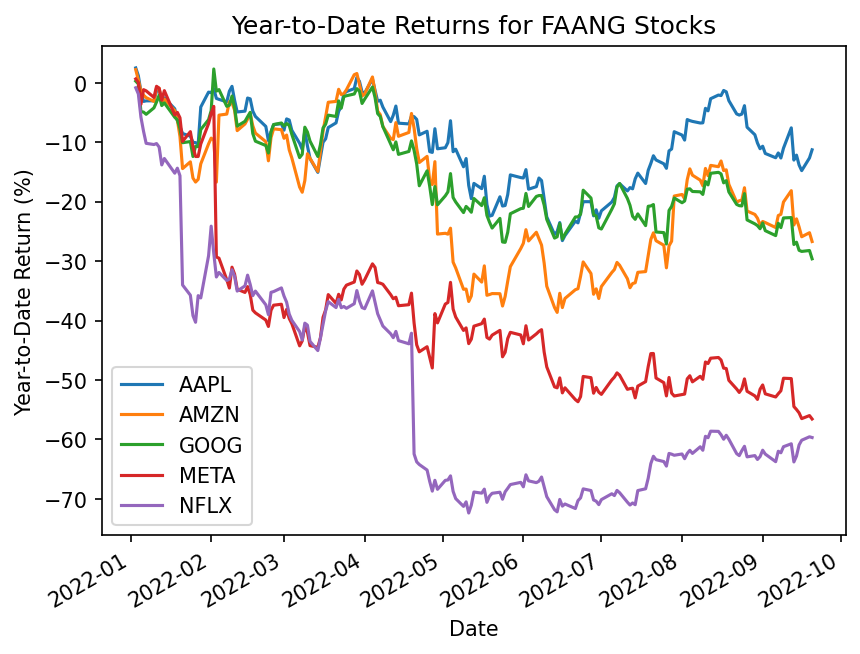

In [7]:
( # we can insert line breaks inside the chain if we wrap the chain in ()
    faang # start with the faang data frame
    ['Adj Close'] # grab all adjusted closes
    .pct_change() # calculate the percent change, which is a return that accounts for splits and dividends
    .loc['2022'] # select returns from 2022
    .add(1) # add 1
    .cumprod() # compound returns
    .sub(1) # subtract 1 to get cumulative (year-to-date) returns
    .mul(100) # multiply by 100 to convert decimal returns to percent returns
    .plot() # plot
)
plt.ylabel('Year-to-Date Return (%)') # add label to y axis (vertical axis)
plt.title('Year-to-Date Returns for FAANG Stocks') # add title
plt.show() # suppress output from plt.title()

## The pandas-datareader package

The [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package provides easy access to a variety of data sources, such as 
    [the Kenneth French Data Library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) 
    and 
    [the Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/).
The pandas-datareader package also provides access to Yahoo! Finance data, but the yfinance package has better documentation.
The pandas-datareader packages should already be installed in your DataCamp Workspace environment.
If not, we can install these packages with the `%pip` magic in the following cell, which we only need to run once.
If you use a local installation of the Anaconda distribution, you can instead run `! conda install -y -c conda-forge pandas-datareader`.

In [8]:
# %pip install pandas-datareader

In [9]:
# ! conda install -y -c conda-forge pandas-datareader

We will use `pdr` as the abbreviated prefix for pandas-datareader.

In [10]:
import pandas_datareader as pdr

He is an example with the daily benchmark factor from Ken French's Data Library.
The `get_available_datasets()` function provides the exact names for all of Ken French's data sets.

In [11]:
pdr.famafrench.get_available_datasets(session=session)[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

Note that pandas-datareader returns a dictionary of data frames and returns the most recent five years of data unless we specify a `start` date.
Most of French's data are available back through the second half od 1926.

In [12]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors_daily', start='1900', session=session)

In [13]:
ff[0]

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.1000,-0.2500,-0.2700,0.0090
1926-07-02,0.4500,-0.3300,-0.0600,0.0090
1926-07-06,0.1700,0.3000,-0.3900,0.0090
1926-07-07,0.0900,-0.5800,0.0200,0.0090
1926-07-08,0.2100,-0.3800,0.1900,0.0090
...,...,...,...,...
2022-07-25,0.1100,-0.3100,1.7000,0.0040
2022-07-26,-1.3200,0.0800,1.0800,0.0040
2022-07-27,2.7200,0.4900,-1.2800,0.0040


In [14]:
print(ff['DESCR'])

F-F Research Data Factors daily
-------------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202207 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2022 Kenneth R. French

  0 : (25292 rows x 4 cols)


## Saving and Reading Data with .csv and .pkl Files

The universal way to save data is to a .csv file (i.e., a file with comma-separated values) with the `.to_csv()` method.
You may need to add a "Data" folder at the same hieracrchy as your "Notebooks" folder using the "File Browser" in JupyterLab's left sidebar.

In [15]:
faang.to_csv('../../Data/FAANG.csv')

We have to pass several arguments to `pd.read_csv()` since the `faang` data frame has a column multiindex (i.e., one level of variables and another for tickers).

In [16]:
pd.read_csv('../../Data/FAANG.csv', header=[0,1], index_col=[0], parse_dates=True)

Adj Close                                        Close           \
                AAPL     AMZN     GOOG     META     NFLX     AAPL     AMZN   
Date                                                                         
1980-12-12    0.1000      NaN      NaN      NaN      NaN   0.1283      NaN   
1980-12-15    0.0948      NaN      NaN      NaN      NaN   0.1217      NaN   
1980-12-16    0.0879      NaN      NaN      NaN      NaN   0.1127      NaN   
1980-12-17    0.0900      NaN      NaN      NaN      NaN   0.1155      NaN   
1980-12-18    0.0926      NaN      NaN      NaN      NaN   0.1189      NaN   
...              ...      ...      ...      ...      ...      ...      ...   
2022-09-14  155.3100 128.5500 105.8700 151.4700 224.1200 155.3100 128.5500   
2022-09-15  152.3700 126.2800 103.9000 149.5500 235.3800 152.3700 126.2800   
2022-09-16  150.7000 123.5300 103.6300 146.2900 240.1300 150.7000 123.5300   
2022-09-19  154.4800 124.6600 103.8500 148.0200 243.6300 154.4800 124.6600   
2022-09-20  156.9000 122.1900 101.8300 146.0900 242.8500 156.9000 122.1900   

                                       ...     Open                    \
               GOOG     META     NFLX  ...     AAPL     AMZN     GOOG   
Date                                   ...                              
1980-12-12      NaN      NaN      NaN  ...   0.1283      NaN      NaN   
1980-12-15      NaN      NaN      NaN  ...   0.1222      NaN      NaN   
1980-12-16      NaN      NaN      NaN  ...   0.1133      NaN      NaN   
1980-12-17      NaN      NaN      NaN  ...   0.1155      NaN      NaN   
1980-12-18      NaN      NaN      NaN  ...   0.1189      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2022-09-14 105.8700 151.4700 224.1200  ... 154.7900 127.3600 105.4400   
2022-09-15 103.9000 149.5500 235.3800  ... 154.6500 127.3800 105.0100   
2022-09-16 103.6300 146.2900 240.1300  ... 151.2100 122.7800 102.9700   
2022-09-19 103.8500 148.0200 243.6300  ... 149.3100 122.1600 102.5400   
2022-09-20 101.8300 146.0900 242.8500  ... 153.4000 123.3500 102.8800   

                                 Volume                               \
               META     NFLX       AAPL           AMZN          GOOG   
Date                                                                   
1980-12-12      NaN      NaN  469033600            NaN           NaN   
1980-12-15      NaN      NaN  175884800            NaN           NaN   
1980-12-16      NaN      NaN  105728000            NaN           NaN   
1980-12-17      NaN      NaN   86441600            NaN           NaN   
1980-12-18      NaN      NaN   73449600            NaN           NaN   
...             ...      ...        ...            ...           ...   
2022-09-14 153.3300 219.8200   87965400  45316800.0000 22115800.0000   
2022-09-15 149.8000 230.4700   90481100  52887200.0000 26494900.0000   
2022-09-16 148.0500 231.2200  162157000 115612500.0000 64518900.0000   
2022-09-19 145.2400 245.0500   81474200  47279700.0000 19738600.0000   
2022-09-20 145.7800 240.3700  107689800  47698400.0000 24001700.0000   

                                        
                    META          NFLX  
Date                                    
1980-12-12           NaN           NaN  
1980-12-15           NaN           NaN  
1980-12-16           NaN           NaN  
1980-12-17           NaN           NaN  
1980-12-18           NaN           NaN  
...                  ...           ...  
2022-09-14 43064200.0000  8230300.0000  
2022-09-15 34606300.0000 19454100.0000  
2022-09-16 40018700.0000 18871600.0000  
2022-09-19 22169500.0000 17912400.0000  
2022-09-20 23217400.0000 16037400.0000  

[10532 rows x 30 columns]

We can use a .pkl file to save and read a pandas object as-is.
These .pkl files are easier to use than .csv files but less universal.

In [17]:
faang.to_pickle('../../Data/FAANG.pkl')

In [18]:
pd.read_pickle('../../Data/FAANG.pkl')

Adj Close                                        Close           \
                AAPL     AMZN     GOOG     META     NFLX     AAPL     AMZN   
Date                                                                         
1980-12-12    0.1000      NaN      NaN      NaN      NaN   0.1283      NaN   
1980-12-15    0.0948      NaN      NaN      NaN      NaN   0.1217      NaN   
1980-12-16    0.0879      NaN      NaN      NaN      NaN   0.1127      NaN   
1980-12-17    0.0900      NaN      NaN      NaN      NaN   0.1155      NaN   
1980-12-18    0.0926      NaN      NaN      NaN      NaN   0.1189      NaN   
...              ...      ...      ...      ...      ...      ...      ...   
2022-09-14  155.3100 128.5500 105.8700 151.4700 224.1200 155.3100 128.5500   
2022-09-15  152.3700 126.2800 103.9000 149.5500 235.3800 152.3700 126.2800   
2022-09-16  150.7000 123.5300 103.6300 146.2900 240.1300 150.7000 123.5300   
2022-09-19  154.4800 124.6600 103.8500 148.0200 243.6300 154.4800 124.6600   
2022-09-20  156.9000 122.1900 101.8300 146.0900 242.8500 156.9000 122.1900   

                                       ...     Open                    \
               GOOG     META     NFLX  ...     AAPL     AMZN     GOOG   
Date                                   ...                              
1980-12-12      NaN      NaN      NaN  ...   0.1283      NaN      NaN   
1980-12-15      NaN      NaN      NaN  ...   0.1222      NaN      NaN   
1980-12-16      NaN      NaN      NaN  ...   0.1133      NaN      NaN   
1980-12-17      NaN      NaN      NaN  ...   0.1155      NaN      NaN   
1980-12-18      NaN      NaN      NaN  ...   0.1189      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2022-09-14 105.8700 151.4700 224.1200  ... 154.7900 127.3600 105.4400   
2022-09-15 103.9000 149.5500 235.3800  ... 154.6500 127.3800 105.0100   
2022-09-16 103.6300 146.2900 240.1300  ... 151.2100 122.7800 102.9700   
2022-09-19 103.8500 148.0200 243.6300  ... 149.3100 122.1600 102.5400   
2022-09-20 101.8300 146.0900 242.8500  ... 153.4000 123.3500 102.8800   

                                 Volume                               \
               META     NFLX       AAPL           AMZN          GOOG   
Date                                                                   
1980-12-12      NaN      NaN  469033600            NaN           NaN   
1980-12-15      NaN      NaN  175884800            NaN           NaN   
1980-12-16      NaN      NaN  105728000            NaN           NaN   
1980-12-17      NaN      NaN   86441600            NaN           NaN   
1980-12-18      NaN      NaN   73449600            NaN           NaN   
...             ...      ...        ...            ...           ...   
2022-09-14 153.3300 219.8200   87965400  45316800.0000 22115800.0000   
2022-09-15 149.8000 230.4700   90481100  52887200.0000 26494900.0000   
2022-09-16 148.0500 231.2200  162157000 115612500.0000 64518900.0000   
2022-09-19 145.2400 245.0500   81474200  47279700.0000 19738600.0000   
2022-09-20 145.7800 240.3700  107689800  47698400.0000 24001700.0000   

                                        
                    META          NFLX  
Date                                    
1980-12-12           NaN           NaN  
1980-12-15           NaN           NaN  
1980-12-16           NaN           NaN  
1980-12-17           NaN           NaN  
1980-12-18           NaN           NaN  
...                  ...           ...  
2022-09-14 43064200.0000  8230300.0000  
2022-09-15 34606300.0000 19454100.0000  
2022-09-16 40018700.0000 18871600.0000  
2022-09-19 22169500.0000 17912400.0000  
2022-09-20 23217400.0000 16037400.0000  

[10532 rows x 30 columns]

In [19]:
d title

SyntaxError: invalid syntax (4250896164.py, line 1)